#**GRU DL Model**

A Gated Recurrent Unit (GRU) is a type of recurrent neural network (RNN) architecture designed to handle sequential data and address the vanishing gradient problem found in traditional RNNs.

## GRU Cell Process

1. **Input Reception**: The GRU cell receives the current input data and the previous hidden state (which contains information from the past).

2. **Update Gate Decision**: The update gate checks how much of the past information needs to be retained. If the update gate decides to keep a lot of past information, it will allow more of the previous hidden state to pass through.

3. **Reset Gate Decision**: The reset gate determines how much of the past information to discard. If the reset gate decides to forget a lot, it will erase much of the previous hidden state.

4. **New Information Processing**: The GRU cell processes the current input and the modified past information (after considering update and reset gates) to create a new candidate hidden state.

5. **Final Hidden State**: The update gate then combines the new candidate hidden state and the past hidden state (based on how much information to retain) to form the final hidden state for the current time step.


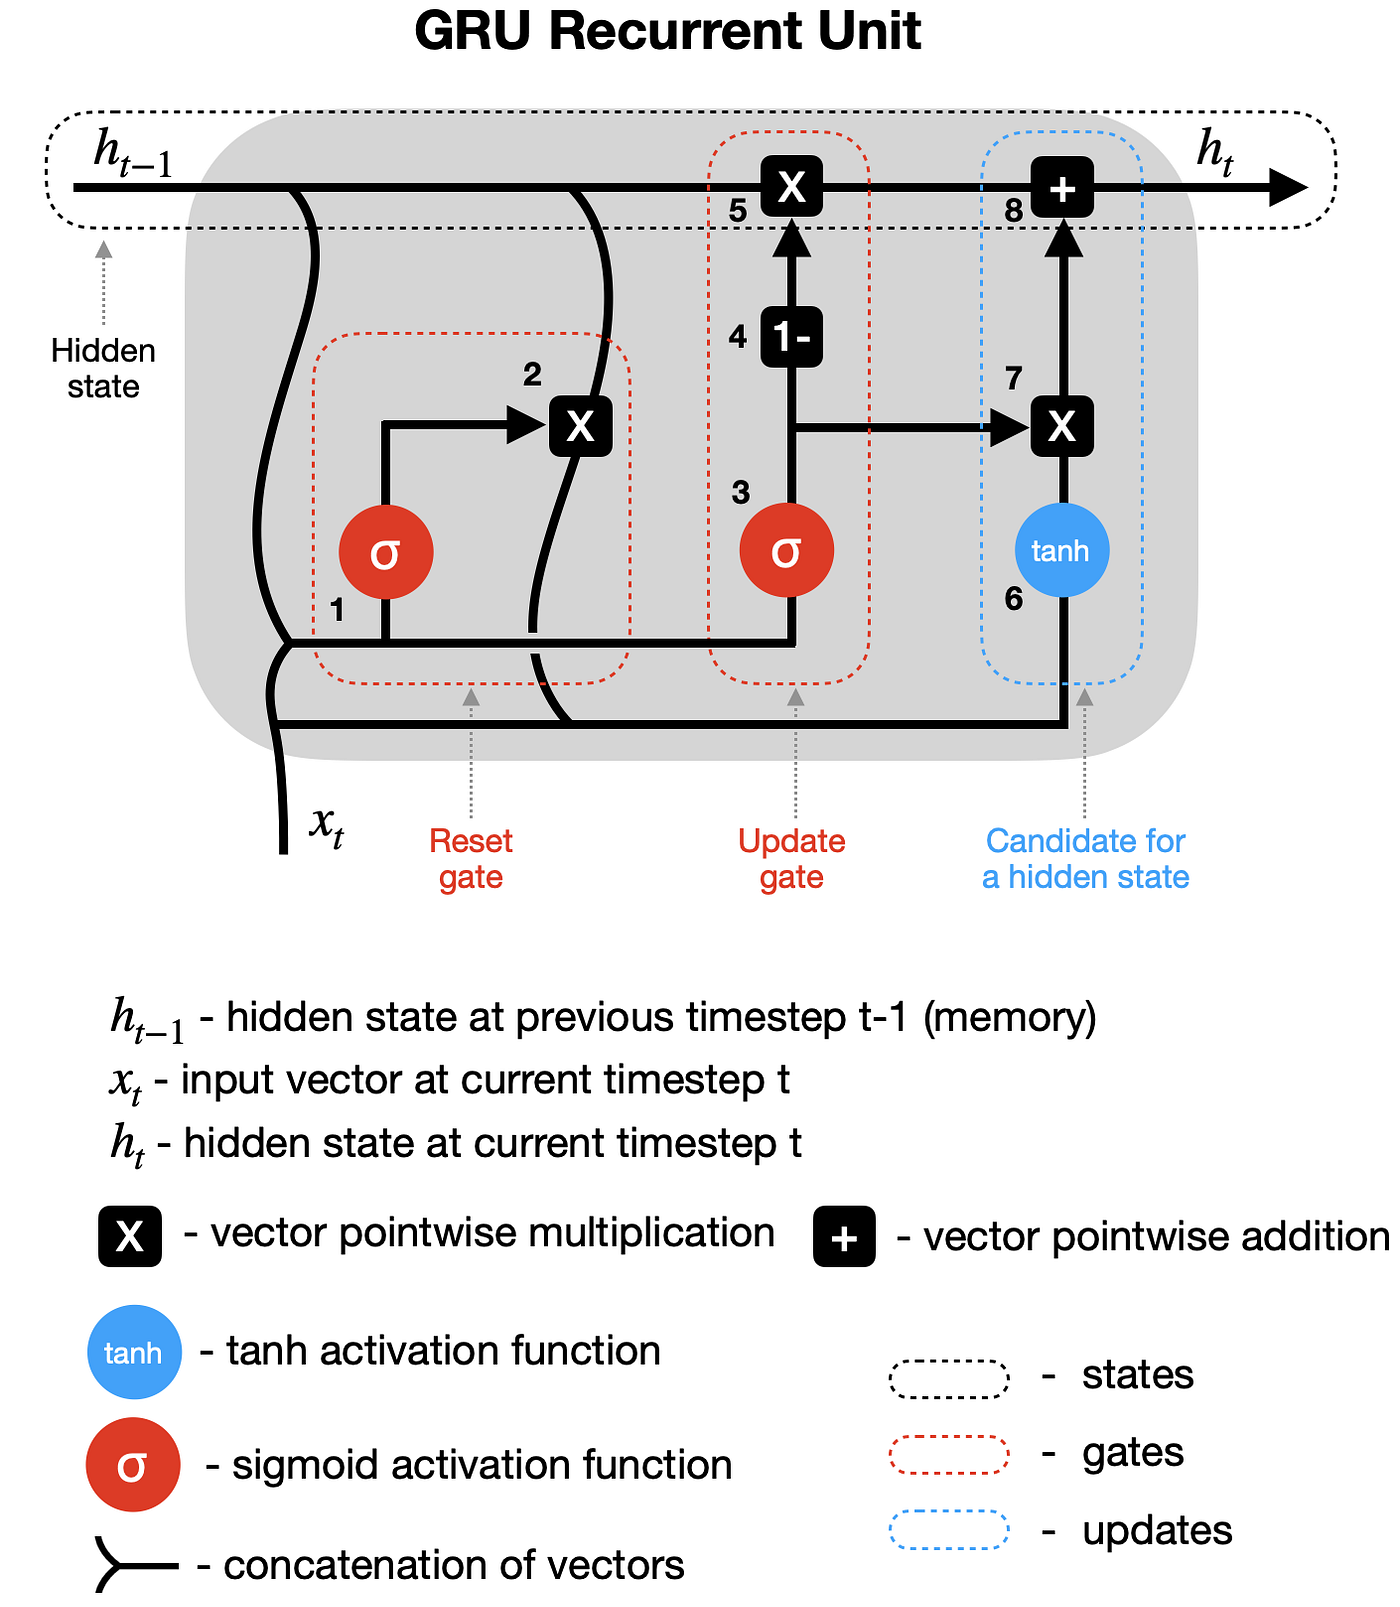

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing necessary packages and dataset**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, Bidirectional, Conv1D, MaxPooling1D, InputLayer,Embedding
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer


In [ ]:
# Load the dataset
file_path1 = '/content/drive/MyDrive/Colab Notebooks/reviews_dataset.xlsx'
df = pd.read_excel(file_path1)


In [ ]:
df

,reviews,Sarcasm
0,One reviewer mention watch 1 Oz episode youll ...,0
1,wonderful little production. filming technique...,0
2,movie groundbreaking experience! Ive never see...,1
3,think wonderful way spend time hot summer week...,0
4,Basically family little boy Jake think zombie ...,1
...,...,...
6492,movie idea character development muscle less b...,1
6493,guess run budget decent script.,1
6494,need plot explosion every five minutes?,1
6495,award generic action movie ever made?,1


**Spliting the data into train and test data**

In [ ]:
# Prepare the data for training
X = df['reviews']
Y = df['Sarcasm']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**Tokenization and Embeddings**

In [ ]:
# Tokenizer and padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_ = pad_sequences(X_train_seq, padding='post')

X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_ = pad_sequences(X_test_seq, padding='post', maxlen=X_train_.shape[1])

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1
max_length = X_train_.shape[1]


In [ ]:
X_train_

array([[  92,  444,    6, ...,    0,    0,    0],
       [ 162,    3,   18, ...,    0,    0,    0],
       [ 693,  429,   17, ...,    0,    0,    0],
       ...,
       [  83,   14,  972, ...,    0,    0,    0],
       [ 212,  131,  653, ...,    0,    0,    0],
       [5533, 2021, 3582, ...,    0,    0,    0]], dtype=int32)

In [ ]:
X_train_.shape

(5197, 942)

**Splting the train data into train and validation data**

In [ ]:
# Further split training data for validation
X_Train, X_validation, y_Train, y_validation = train_test_split(X_train_, y_train, test_size=0.2, random_state=42)


#**GRU Model Training**

**Model layers**

1. **Embedding Layer**
   - This layer converts the integer-encoded words from your vocabulary into dense vectors of fixed size .It helps in transforming the input data into a format suitable for the neural network.

2. **Conv1D Layer**
   - This 1D convolutional layer applies 128 filters of size 5 to the input sequence. It captures local patterns in the data, such as specific word sequences or n-grams, which is useful for text processing.

3. **MaxPooling1D Layer**
   - This layer reduces the dimensionality of the input, summarizing the presence of features in sub-sequences of the data. It helps in down-sampling the input representation.

4. **Bidirectional GRU Layer 1**
   - This layer consists of a GRU cell with 512 units, wrapped in a bidirectional wrapper. It processes the input sequence from both directions (forward and backward) and returns the full sequence of outputs.

5. **Bidirectional GRU Layer 2**
   - This layer consists of a GRU cell with 128 units, wrapped in a bidirectional wrapper. It processes the input sequence from both directions and returns only the last output in the sequence.

6. **Dense Layer 1**
   - This fully connected layer with n units applies a ReLU activation function, introducing non-linearity to the model and allowing it to learn complex patterns.

7. **Output Layer**
   - This layer has a single unit with a sigmoid activation function, making it suitable for binary classification tasks. It outputs a probability score between 0 and 1.

Metrics

- **Precision**: Measures the accuracy of the positive predictions.
- **Recall**: Measures the ability of the model to find all relevant instances in the dataset.

Model Compilation

- **Loss Function**: `binary_crossentropy` - Suitable for binary classification tasks.
- **Optimizer**: `adam` - An efficient optimization algorithm that adjusts the learning rate automatically.

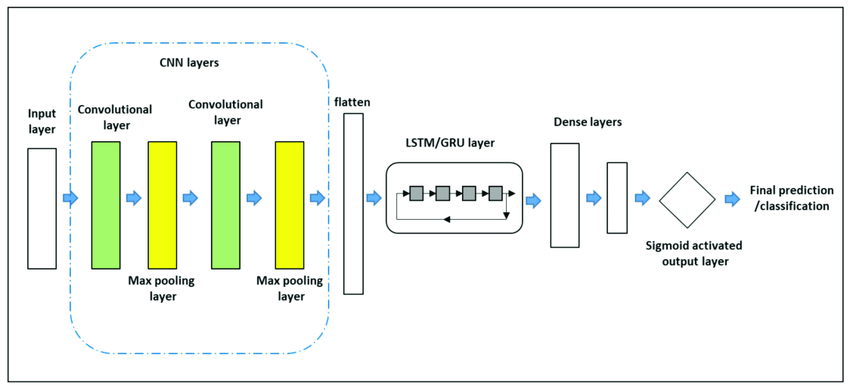

In [ ]:
#model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(GRU(512, activation='tanh', recurrent_activation='sigmoid', return_sequences=True)))
model.add(Bidirectional(GRU(128, activation='tanh', recurrent_activation='sigmoid')))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
metrics = [
    tf.keras.metrics.Precision(name="precision"),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 942, 128)          3781888   
                                                                 
 conv1d (Conv1D)             (None, 938, 128)          82048     
                                                                 
 max_pooling1d (MaxPooling1  (None, 469, 128)          0         
 D)                                                              
                                                                 
 bidirectional (Bidirection  (None, 469, 1024)         1972224   
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               886272    
 onal)                                                           
                                                        

**Callbacks**

1. **EarlyStopping**
   - This callback monitors a specified metric during training (e.g., validation loss). If the monitored metric stops improving for a certain number of epochs (patience), the training is halted. This helps to prevent overfitting and reduces training time. The `restore_best_weights=True` option ensures that the model weights are restored to the best state observed during training.

2. **ReduceLROnPlateau**
   - This callback reduces the learning rate when a monitored metric (e.g., validation loss) has stopped improving. If the metric does not improve for a specified number of epochs (patience), the learning rate is reduced by a certain factor (e.g., 0.1). This helps the model to converge more efficiently by allowing it to make smaller adjustments when progress slows down. The `min_lr` parameter ensures that the learning rate does not go below a specified threshold.


In [ ]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001)

# Fit the model
model.fit(X_Train, y_Train, validation_data=(X_validation, y_validation), epochs=10, batch_size=64, verbose=2,
          callbacks=[early_stopping_callback, reduce_lr_callback])

model.evaluate(X_test_, y_test)

Epoch 1/10
65/65 - 45s - loss: 0.4932 - precision: 0.8057 - recall: 0.7851 - val_loss: 0.3931 - val_precision: 0.9388 - val_recall: 0.7446 - lr: 0.0010 - 45s/epoch - 687ms/step
Epoch 2/10
65/65 - 21s - loss: 0.2304 - precision: 0.9327 - recall: 0.8989 - val_loss: 0.4973 - val_precision: 0.8482 - val_recall: 0.7842 - lr: 0.0010 - 21s/epoch - 321ms/step
Epoch 3/10
65/65 - 21s - loss: 0.0559 - precision: 0.9780 - recall: 0.9828 - val_loss: 0.7707 - val_precision: 0.7649 - val_recall: 0.8076 - lr: 0.0010 - 21s/epoch - 323ms/step
Epoch 4/10
65/65 - 22s - loss: 0.0238 - precision: 0.9947 - recall: 0.9947 - val_loss: 1.1858 - val_precision: 0.8093 - val_recall: 0.7482 - lr: 0.0010 - 22s/epoch - 341ms/step
Epoch 5/10
65/65 - 22s - loss: 0.0068 - precision: 0.9987 - recall: 0.9987 - val_loss: 1.1611 - val_precision: 0.7855 - val_recall: 0.7968 - lr: 5.0000e-04 - 22s/epoch - 331ms/step
Epoch 6/10
65/65 - 20s - loss: 0.0023 - precision: 0.9996 - recall: 1.0000 - val_loss: 1.4814 - val_precision: 

[0.4207957088947296, 0.904347836971283, 0.7471264600753784]

In [ ]:
y_predict = model.predict(X_test_)
y_predict = np.where(y_predict > 0.5, 1, 0).flatten()

# Classification report
report = classification_report(y_test, y_predict)
print(report)


41/41 [==============================] - 4s 65ms/step
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       604
           1       0.90      0.75      0.82       696

    accuracy                           0.82      1300
   macro avg       0.83      0.83      0.82      1300
weighted avg       0.84      0.82      0.82      1300



In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/GRU DL model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import re
import string

In [ ]:
def clean_text(text):
    # Compile regular expressions for HTML tags and URLs , defining punctuation marks to remove
    html_pattern = re.compile('<.*?>')
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    punctuation_to_remove = ''.join(p for p in string.punctuation if p not in ['?', '!', '.'])

    # Remove HTML tags,urls,punctuation marks
    text = html_pattern.sub('', text)
    text = url_pattern.sub('', text)
    text = text.translate(str.maketrans('', '', punctuation_to_remove))

    # Remove extra white spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag

lemmatizer = WordNetLemmatizer()

# convert POS tag to a format recognized by the lemmatizer
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatization(sentence):
    words = sentence.split()
    pos_tags = pos_tag(words)
    return ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags])


In [ ]:
def predict_new_data(text, model_gru, tokenizer, max_length):
    # Preprocess the new data
     new_data_cleaned = []
     text_cleaned = clean_text(text)
     text_no_stopwords = remove_stopwords(text_cleaned)
     text_lemmatized = lemmatization(text_no_stopwords)
     new_data_cleaned.append(text_lemmatized)
     # Tokenize and pad the new data
     new_data_seq = tokenizer.texts_to_sequences(new_data_cleaned)
     new_data_padded = pad_sequences(new_data_seq, padding='post', maxlen=max_length)
     # Predict using GRU model
     gru_predictions = model.predict(new_data_padded)
     predictions = np.where(gru_predictions > 0.5, 1, 0).flatten()
     if (predictions==1):
      return("Sarcastic")
     else: return("Not Sarcastic")


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
review= "Despite its star-studded cast, 'Cats' fails to capture the magic of the stage musical.The awkward CGI and lackluster choreography detract from the experience, resulting in a confusing and unsettling film that left audiences disappointed."
print("actual : Not Sarcastic")
a=predict_new_data(review, model, tokenizer, max_length)
print( a)


actual : Not Sarcastic
1/1 [==============================] - 0s 45ms/step
Not Sarcastic


In [ ]:
review= "Congratulations to the special effects team for making everything look like it came straight out of a video game from the '90s! I didn’t realize I was watching a film; I thought I was playing an outdated arcade game. Truly groundbreaking work!"
print("actual : Sarcastic")
b=predict_new_data(review, model, tokenizer, max_length)
print(b)

actual : Sarcastic
1/1 [==============================] - 0s 48ms/step
Not Sarcastic


In [ ]:
review= "This installment suffers from a convoluted plot and excessive length, leaving viewers confused and exhausted. The over-reliance on special effects overshadows any meaningful character development, making it feel like a cash grab rather than a cohesive story."
print("actual : Sarcastic")
c=predict_new_data(review, model, tokenizer, max_length)
print(c)


actual : Sarcastic
1/1 [==============================] - 0s 48ms/step
Sarcastic


In [ ]:
review= "A touching story about a man who travels across borders—too bad he didn’t bother with a map!"
print("actual : Sarcastic")
d=predict_new_data(review, model, tokenizer, max_length)
print(d)


actual : Sarcastic
1/1 [==============================] - 0s 50ms/step
Sarcastic


In [ ]:
review= "The cast delivers strong performances, particularly Prabhas and Rana Daggubati, who bring depth to their roles. Their on-screen chemistry enhances the emotional weight of the story."
print("actual : Not Sarcastic")
e=predict_new_data(review, model, tokenizer, max_length)
print(e)


actual : Not Sarcastic
1/1 [==============================] - 0s 49ms/step
Not Sarcastic


In [ ]:
review= "A coming-of-age tale that encourages you to embrace your existential crisis—while wearing designer clothes."
print("actual : Sarcastic")
f=predict_new_data(review, model, tokenizer, max_length)
print(f)


actual : Sarcastic
1/1 [==============================] - 0s 49ms/step
Sarcastic


In [ ]:
review= "Kalki presents a fresh take on mythology, blending traditional elements with modern storytelling. The unique premise keeps the audience engaged throughout"
print("actual : Not Sarcastic")
g=predict_new_data(review, model, tokenizer, max_length)
print (g)


actual : Not Sarcastic
1/1 [==============================] - 0s 51ms/step
Not Sarcastic


In [ ]:
review= "Jawan, delivers a high-octane blend of action and drama, showcasing Shah Rukh Khan in a dual role. The film's pacing keeps you on the edge of your seat, making it a must-watch for action enthusiasts."
print("actual : Not Sarcastic")
h=predict_new_data(review, model, tokenizer, max_length)
print(h)

actual : Not Sarcastic
1/1 [==============================] - 0s 51ms/step
Not Sarcastic


In [ ]:
review="A movie that really proves love is blind... and deaf to logic."
print("actual : Sarcastic")
predictions=predict_new_data(review, model, tokenizer, max_length)
print(predictions)


actual : Sarcastic
1/1 [==============================] - 0s 44ms/step
Sarcastic


In [ ]:
review="A masterpiece in making bad choices look glamorous!"
print("actual : Sarcastic")
predictions=predict_new_data(review, model, tokenizer, max_length)
print(predictions)

actual : Sarcastic
1/1 [==============================] - 0s 67ms/step
Sarcastic


#**Conclusion**
- The GRU-based model demonstrates strong performance, achieving an overall accuracy of 82% on the dataset, with balanced precision and recall across both classes. It correctly predicted 8 out of 10 reviews in a small explicit test, highlighting its robustness and reliability.
- The GRU model is particularly effective because it combines simplicity and efficiency, making it faster to train and less computationally intensive than LSTM models. Despite its simpler architecture, the GRU effectively manages the vanishing gradient problem and captures long-term dependencies in sequential data, often performing on par with or better than LSTMs.
-  This makes the GRU model a suitable and powerful choice for the text classification task at hand.